In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load 'Iris.csv' dataset, perform exploratory analysis(draw box plots, bar plots of features, scatter plots of feature pairs)

In [54]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

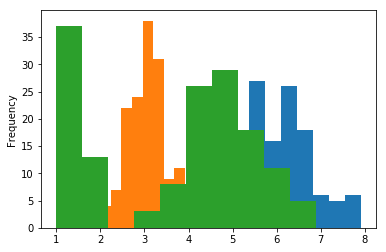

In [55]:
df['SepalLengthCm'].plot.hist()
df['SepalWidthCm'].plot.hist()
df['PetalLengthCm'].plot.hist()
df['Species'].unique()

## 1. Logistic regression

In the dataset there are three species of iris: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'. Process the dataset and split it with 80/20 ratio. Fit two logistic regression models:
1. The first model must predict whether an entry is Iris-setosa or not.
2. The second model must predict whether an entry is Iris-virginica or not.

Using this two models, predict classes of test set and report accuracy.

Make 2 scatter plots using all data, both train and test.
1. Plot SepalLengthCm vs SepalWidthCm, color according to their classes, plot the decision boundaries of the two models on the same plot.
2. Plot PetalLengthCm vs PetalWidthCm, color according to their classes, plot the decision boundaries of the two models on the same plot.


In [56]:
df['Species'].replace({'Iris-setosa': 1 , 'Iris-versicolor': 0 , 'Iris-virginica': 0}, inplace=True)
df.drop(['Id'], inplace=True , axis=1)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Species'])] , df['Species'], random_state=42, test_size=0.2)

LR = LogisticRegression(solver='lbfgs')
LR.fit(xTrain, yTrain)
y_pred = LR.predict(xTest)
f1_score(yTest, y_pred)

1.0

In [106]:
# 2rd model 
df2 = pd.read_csv('Iris.csv')

df2['Species'].replace({'Iris-setosa': 0 , 'Iris-versicolor': 0 , 'Iris-virginica': 1}, inplace=True)
df2.drop(['Id'], inplace=True , axis=1)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(df2[df2.columns.difference(['Species'])] , df2['Species'], random_state=42, test_size=0.2)

LR2 = LogisticRegression(solver='lbfgs')
LR2.fit(xTrain2, yTrain2)
y_pred2 = LR.predict(xTest2)
f1_score(yTest2, y_pred2)

1.0

In [107]:
len(xTest)

30

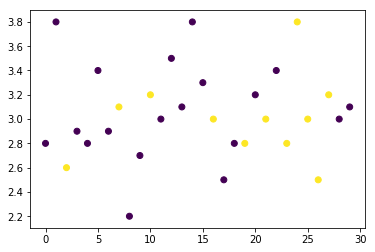

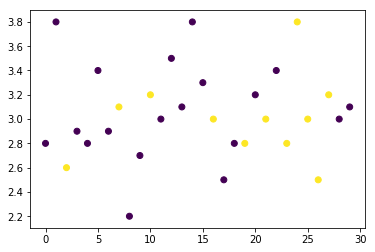

In [109]:
plt.scatter(range(len(xTest)), xTest['SepalWidthCm'], c=y_pred)
#plt.scatter(range(30), xTest['SepalLengthCm'], c=y_pred)
plt.show()
plt.scatter(range(len(xTest2)), xTest2['SepalWidthCm'], c=y_pred2)
plt.show()

## 2. Kmeans

Use the splitted dataset in task 1 to fit a Kmeans model on training set with K = 3. Infer which cluster center corresponds to which class. Predict classes on test set and report accuracy, compare it with previous task. Repeat the two plots from the previous task. Add the cluster centers to the plot.

In [209]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

df = pd.read_csv('Iris.csv')
df['Species'].replace({'Iris-setosa': 0 , 'Iris-versicolor': 1 , 'Iris-virginica': 2}, inplace=True)
df.drop(['Id'], inplace=True , axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Species'])] , df['Species'], random_state=42, test_size=0.2)

KM = KMeans(n_clusters=3, random_state=23)
KM.fit(xTrain)
label = KM.predict(xTrain)
KM.cluster_centers_

array([[5.70689655, 2.02068966, 6.85517241, 3.10344828],
       [1.4525    , 0.2425    , 4.99      , 3.44      ],
       [4.38627451, 1.44313725, 5.85686275, 2.73137255]])

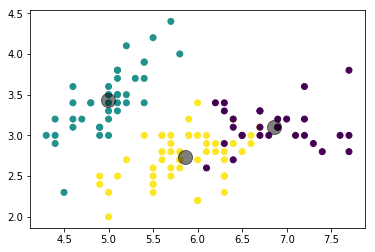

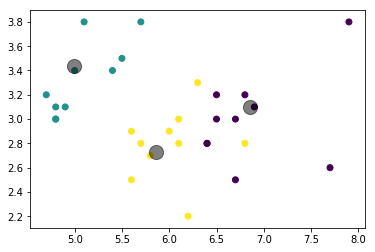

In [218]:
plt.scatter(xTrain['SepalLengthCm'] , xTrain['SepalWidthCm'], c=label)
centers = KM.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);
plt.show()

plt.scatter(xTest['SepalLengthCm'], xTest['SepalWidthCm'], c=KM.predict(xTest))
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);
plt.show()

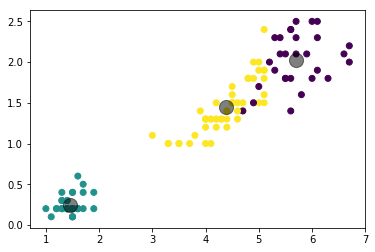

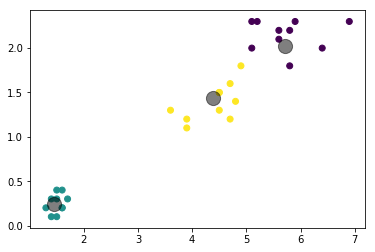

In [227]:
plt.scatter(xTrain['PetalLengthCm'] , xTrain['PetalWidthCm'], c=label)
centers = KM.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

plt.scatter(xTest['PetalLengthCm'], xTest['PetalWidthCm'], c=KM.predict(xTest))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()